In [1]:
!pip install pandas ipython-sql sqlalchemy

In [10]:
# 1. Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# 2. Loading the dataset
df_all = pd.read_csv("metal_health_data.csv")

In [14]:
# 3. Ensuring numeric columns are properly formatted
numeric_cols = ['stay', 'todep', 'tosc', 'toas']
df_all[numeric_cols] = df_all[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [16]:
# 4. Filtering for international students only (cleaning whitespace)
df_inter = df_all[df_all['inter_dom'].str.strip() == 'Inter']

In [18]:
# 5. Aggregating data by length of stay
df = df_inter.groupby('stay').agg(
    count_int=('stay', 'count'),
    average_phq=('todep', 'mean'),
    average_scs=('tosc', 'mean'),
    average_as=('toas', 'mean')
).reset_index()

In [20]:
# 6. Rounding the average columns for better readability
df[['average_phq', 'average_scs', 'average_as']] = df[
    ['average_phq', 'average_scs', 'average_as']
].round(2)

In [22]:
# 7. Sorting descending by stay and keep top 9 rows
df = df.sort_values(by='stay', ascending=False).head(9)

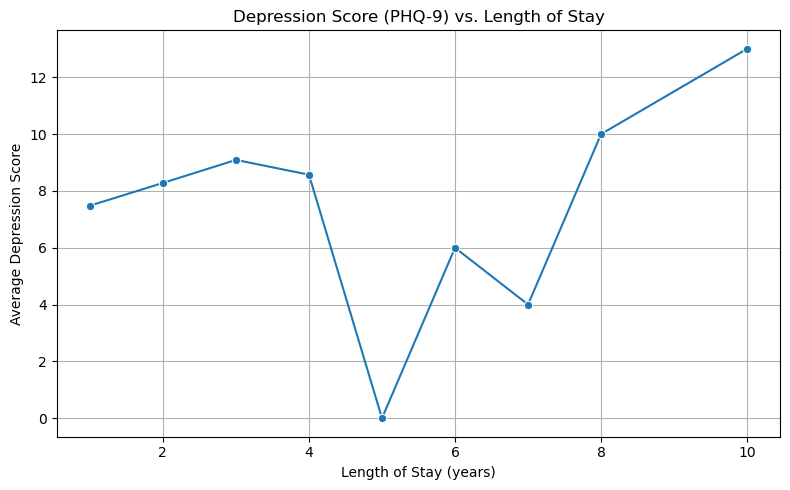

In [24]:
# 8. Ploting: Depression score vs Length of stay
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="stay", y="average_phq", marker="o")
plt.title("Depression Score (PHQ-9) vs. Length of Stay")
plt.xlabel("Length of Stay (years)")
plt.ylabel("Average Depression Score")
plt.grid(True)
plt.tight_layout()
plt.show()

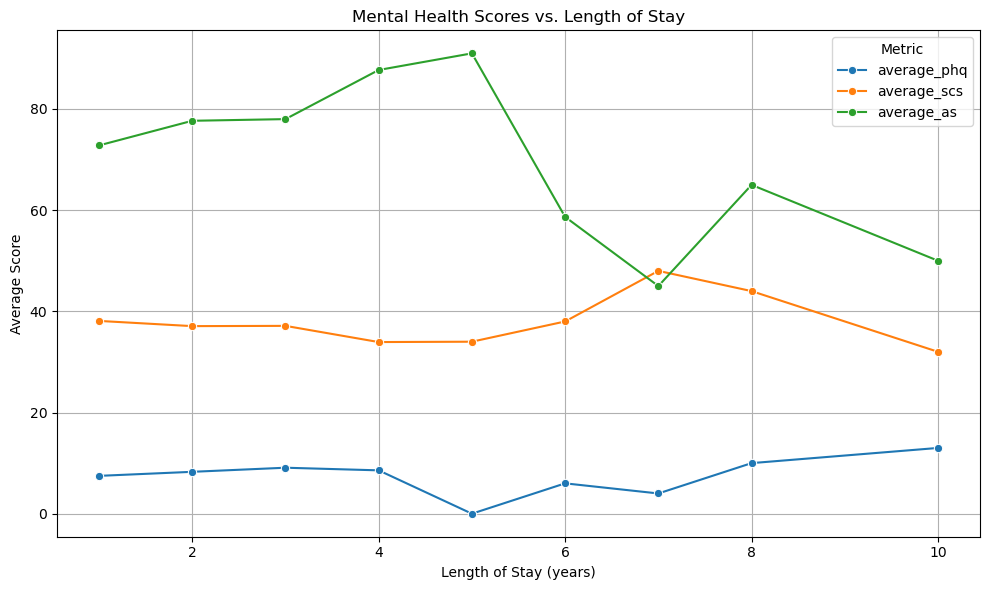

In [26]:
# 9. Ploting: All three mental health metrics vs Length of stay
df_melted = df.melt(id_vars="stay", 
                    value_vars=["average_phq", "average_scs", "average_as"],
                    var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x="stay", y="Score", hue="Metric", marker="o")
plt.title("Mental Health Scores vs. Length of Stay")
plt.xlabel("Length of Stay (years)")
plt.ylabel("Average Score")
plt.grid(True)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()